# Dynamical Decoupling (DD) Simulation
## Special case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [1]:
import numpy as np
import scipy
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [8]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0,1,num=100):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)

    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
   
    time.append(t)

print(epsilon[99])
    


(0.005061354233638016+0.14137576172413657j)


## Graph t vs $\epsilon$

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


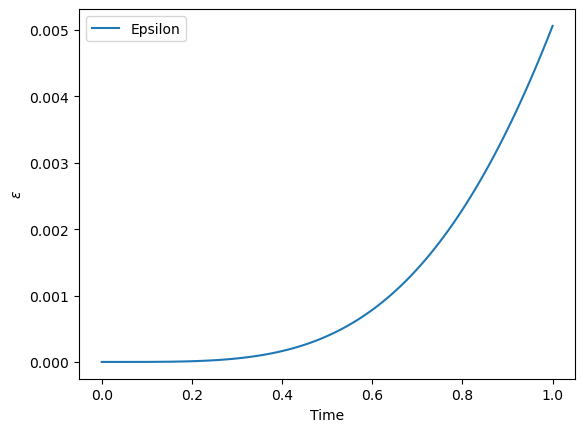

In [4]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previou case is:\
Ideal system: **$e^{-iZt_1}e^{-iZt_2}e^{-iZt_3}...e^{-iZt_m}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t_1}e^{-i(Z+\lambda{X})t_2}e^{-i(Z+\lambda{X})t_3}...e^{-i(Z+\lambda{X})t_m}$**
#### Want to simulate
**$\epsilon=||(e^{-i(Z+\lambda{X})t_1}Ze^{-i(Z+\lambda{X})t_2}Ze^{-i(Z+\lambda{X})t_3}Ze^{-i(Z+\lambda{X})t_4}Z...Ze^{-i(Z+\lambda{X})t_m}Z) - e^{-iZ(t_1+t_2+t_3+...+t_m)}||$**
### Simulation

In [5]:
def error_calculation(lambda_value, m):
    sum_t = 0
    prev_A = expm(-1j*(Z+lambda_value*X)*0)

    # simulating the equation 
    for t in np.linspace(1,m,num=m):
        # even numbers
        if (t%2 == 0):
            A = prev_A * expm(-1j*(Z-lambda_value*X)*t)
            #print("even ", t)
        # odd numbers
        else:
            A = prev_A * expm(-1j*(Z+lambda_value*X)*t)
            #print("odd ", t)
        # updating variables
        sum_t += t
        prev_A = A 
        
    B = expm(-1j*Z*(sum_t))
    # calculate the difference between the ideal and noisy system
    difference = A - B

    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

    
    
# creating the variables
time = []
epsilon = []

# set the value of lambda 
lambda_value = 0.1

for m in range(1,51,1):
    epsilon.append(error_calculation(lambda_value, m))
    time.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m)))
   
 

For m = 1 the error is (-0.004203591607715218+0.001505068144159405j)
For m = 2 the error is (0.0055641741734304695-0.015454953566211432j)
For m = 3 the error is (0.000584143753223465-0.031048388230538737j)
For m = 4 the error is (0.03549308185593891-0.03323179752020666j)
For m = 5 the error is (-0.03396108308385226-0.06693180891951322j)
For m = 6 the error is (-0.07516192248409648-0.0740374489178347j)
For m = 7 the error is (-0.010631228394192616-0.13706793234205855j)
For m = 8 the error is (0.17698757768566545-0.015320609597691215j)
For m = 9 the error is (-0.2105592074634849-0.07402731781537897j)
For m = 10 the error is (0.2611918784602597+0.06644556272974844j)
For m = 11 the error is (0.08938924651733648-0.31016856677260546j)
For m = 12 the error is (-0.10070590730196793-0.3690106332536923j)
For m = 13 the error is (0.08353121852458356-0.4346299747454809j)
For m = 14 the error is (0.5059389926475396-0.04415914883511707j)
For m = 15 the error is (-0.4823948028769097-0.322210509092662

## Graph t vs $\epsilon$

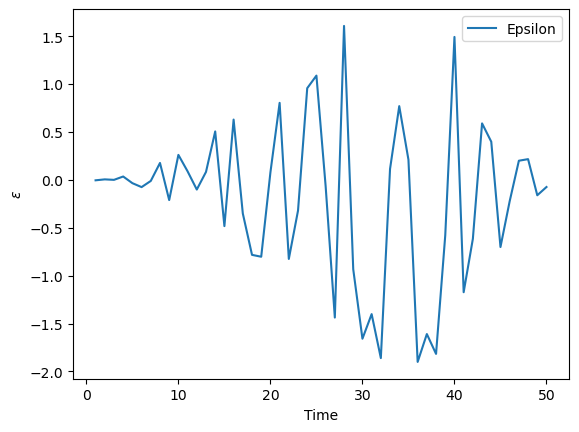

In [6]:
# graph the changes of the error for different values of m
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('general_simulation.png')
plt.show()
